In [19]:
import os, sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast
import numpy as np

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1

plt.rcParams.update({
    'figure.dpi': 300,
    'axes.labelsize': 30.0,
    'axes.titlesize': 30.0,
    'axes.labelweight': 'normal',
    'axes.linewidth': 1.25,
    'legend.fontsize': 25,
    'legend.title_fontsize': 18.0,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'lines.linewidth': 2.0,
    'lines.markersize': 6.0,
    'grid.color': '.8',
    'grid.linestyle': '-',
    'grid.linewidth': 1.0,
})

if dir1 not in sys.path: sys.path.append(dir0)

from src.utils import ExperimentUtils

In [20]:
def prep_df(df, meth):
    df = df.drop('parameters', axis=1)
    df = df.drop('flops', axis=1)
    df = df.drop('training_memory_usage', axis=1)
    df = df.drop('inference_time', axis=1)
    df['method'] = meth
    return df

def get_info_train_low_roll_high(path, agents=20):
    df = pd.read_csv(path)
    df["rewards"] = df["rewards"].apply(ast.literal_eval)
    df["rewards"] = df["rewards"].apply(lambda outer: [np.mean(inner) for inner in outer])

    df_exploded = df.explode("rewards")

    df_exploded["rewards"] = df_exploded["rewards"].astype(float)
    df_agents_desired = df_exploded[df_exploded["agents"] == agents]

    return df_agents_desired


def transplant_rollout_for_just_low(path_rollout, path_training):
    df_just_low_rollout = get_info_train_low_roll_high(path_rollout, agents=20)
    print(df_just_low_rollout)
    suite_just_low = ExperimentUtils(path=path_training, map_strategy_names=True)



    df_table_just_low = suite_just_low.create_table_verbose()
    # glo_just_low = df_table_just_low

    df_table_just_low = prep_df(df_table_just_low, 'low')


    # Group new rewards by strategy
    new_rewards = df_just_low_rollout.groupby(df_just_low_rollout['strategy'].str.upper())['rewards'].apply(list).to_dict()

    new_rewards.update({'SET': new_rewards.pop('SET_TRANSFORMER_INV')})
    new_rewards.update({'ISAB': new_rewards.pop('ISAB_TRANSFORMER')})
    new_rewards.update({'SAB': new_rewards.pop('SAB_TRANSFORMER')})

    new_rewards.update({'GSAGE': new_rewards.pop('GRAPH_SAGE')})
    new_rewards.update({'GAT': new_rewards.pop('GRAPH_GAT')})
    new_rewards.update({'GATv2': new_rewards.pop('GRAPH_GAT_V2')})

    # Replace mean_rewards in df_2 with the new ones
    df_table_just_low['mean_rewards'] = df_table_just_low['Experiment'].map(new_rewards)

    return df_table_just_low

In [21]:
df_table_just_low = transplant_rollout_for_just_low('/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/2_balance_train_low_roll_high_rollout.csv', '/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/2_balance_train_low_roll_high.csv')

# print(df_table_just_low)

            strategy  agents    rewards
4             concat      20  60.268558
4             concat      20  67.201406
4             concat      20  72.002792
4             concat      20  43.067874
4             concat      20  55.685152
..               ...     ...        ...
49  isab_transformer      20  73.309500
49  isab_transformer      20  78.484947
49  isab_transformer      20  82.089122
49  isab_transformer      20  63.706728
49  isab_transformer      20  76.768739

[100 rows x 3 columns]


In [22]:
suite_just_high = ExperimentUtils(path='/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/3_balance_just_high.csv', map_strategy_names=True)

df_table_just_high = suite_just_high.create_table_verbose()
df_table_just_high = prep_df(df_table_just_high, 'high')

print(df_table_just_high)



   Experiment                                      training_time  \
0      CONCAT  [134.13363885879517, 135.79673743247986, 137.2...   
1         MLP  [385.556396484375, 383.3117153644562, 385.3978...   
2   MLP_LOCAL  [189.41592264175415, 191.46295809745789, 189.2...   
3  MLP_GLOBAL  [399.5738527774811, 396.1703083515167, 396.994...   
4       GSAGE  [220.35667634010315, 218.89398908615112, 221.0...   
5         GAT  [1238.5938022136688, 1237.213711977005, 1235.1...   
6       GATv2  [686.0689685344696, 698.728698015213, 696.3746...   
7         SAB  [312.7441108226776, 314.92222809791565, 313.79...   
8        ISAB  [344.27678871154785, 337.8242404460907, 333.17...   
9         SET  [388.3549919128418, 386.38295340538025, 386.24...   

                                        mean_rewards  \
0  [105.89105987548828, 85.44131469726562, 94.486...   
1  [75.38681030273438, 92.69268798828125, 81.3041...   
2  [89.3421630859375, 102.31365966796875, 80.4520...   
3  [91.62288665771484, 70.2

In [23]:
suite_mostly = ExperimentUtils(path='/Users/simonhampp/Desktop/MA/swarm-rl/src/experiments_ma/7_generalizability/saved_experiments/3_balance_75_high.csv', map_strategy_names=True)

df_table_mostly_low = suite_mostly.create_table_verbose()
df_table_mostly_low = prep_df(df_table_mostly_low, '75% low')
print(df_table_mostly_low)

   Experiment                                      training_time  \
0      CONCAT  [62.29833984375, 62.61949920654297, 62.8402893...   
1         MLP  [186.87914991378784, 187.0322344303131, 187.79...   
2   MLP_LOCAL  [102.84982347488403, 101.06622385978699, 102.6...   
3  MLP_GLOBAL  [205.45149493217468, 198.37451195716858, 200.1...   
4       GSAGE  [101.91128134727478, 101.04912972450256, 99.97...   
5         GAT  [442.32185220718384, 431.1338176727295, 439.28...   
6       GATv2  [232.28503680229187, 237.23580813407898, 240.8...   
7         SET  [186.44184470176697, 184.97489643096924, 186.1...   
8         SAB  [194.8798360824585, 193.19948482513428, 197.79...   
9        ISAB  [165.68407082557678, 165.87461924552917, 164.1...   

                                        mean_rewards  \
0  [84.25125122070312, 61.986297607421875, 77.112...   
1  [75.97774505615234, 64.33946228027344, 86.9664...   
2  [84.90693664550781, 83.87505340576172, 84.6804...   
3  [82.47663116455078, 67.3

In [24]:
def plot_mostly(df, to_plot='mean_rewards'):
    # df[to_plot] = df[to_plot].apply(ast.literal_eval)
    df[to_plot] = df[to_plot].apply(lambda outer: [np.mean(inner) for inner in outer])

    df_exploded = df.explode(to_plot)

    df_exploded[to_plot] = df_exploded[to_plot].astype(float)

    # Initialize the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_exploded, x="method", y=to_plot, hue="Experiment", dodge=True)

    # Final touches Training Time (s), Mean Rewards
    plt.ylabel("Training Time (s)")
    plt.xlabel("Training Method")
    ax.get_legend().remove()

    # Get positions and draw lines/text
    positions = ax.get_xticks()
    unique_agents = df_exploded["method"].unique()
    for pos, agent_count in zip(positions, unique_agents):
        group_mean = df_exploded[df_exploded["method"] == agent_count][to_plot].mean()
        ax.hlines(group_mean, pos - 0.4, pos + 0.4, colors="black", linestyles="--", linewidth=1.5)

        # # Text to the left of the line, centered vertically
        ax.text(pos, group_mean + 60, f"{group_mean:.1f}",
                ha="right", va="center", fontsize=22, color="black")# , rotation=90)
        # Text to the left of the line, centered vertically
        # ax.text(pos, group_mean+12, f"{group_mean:.1f}",
        #         ha="right", va="center", fontsize=22, color="black")# , rotation=90)

    plt.tight_layout()
    plt.show()
    return df_exploded


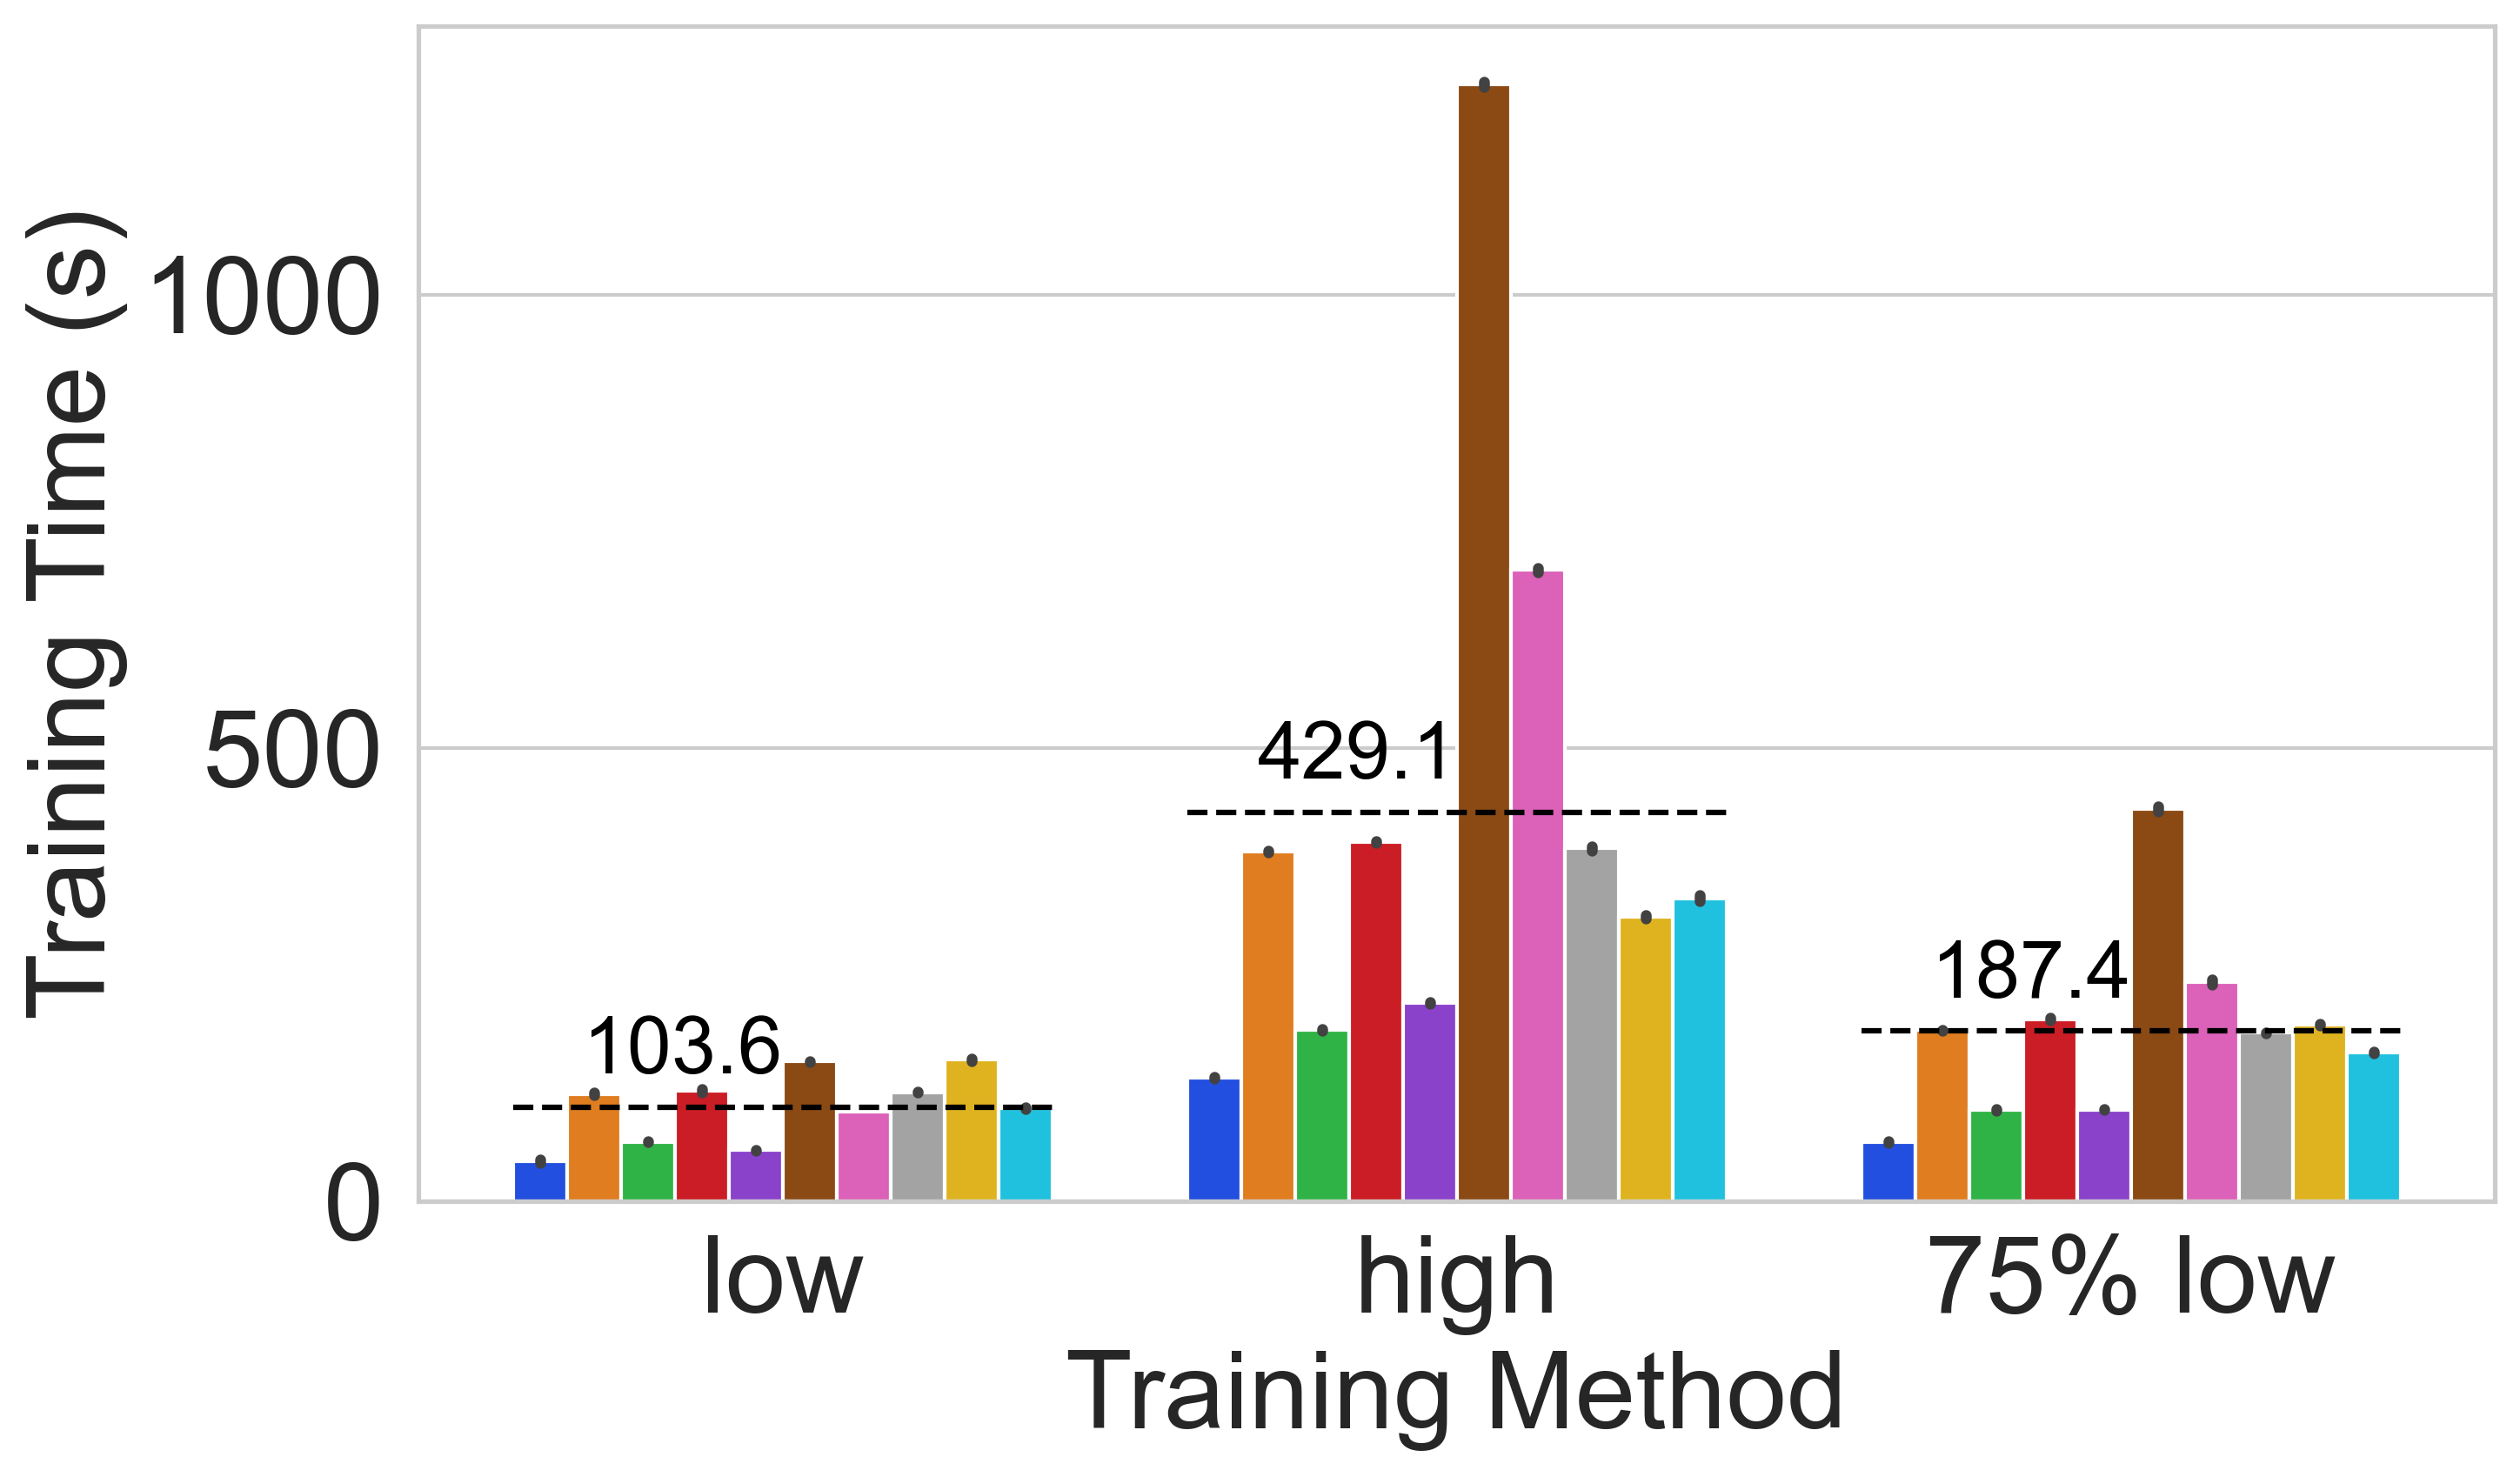

,Experiment,training_time,mean_rewards,loss,method
0,CONCAT,38.854831,"[60.268557739257815, 67.20140571594239, 72.002...","[-0.7073343495527903, -0.42517061879237494, -0...",low
0,CONCAT,39.188636,"[60.268557739257815, 67.20140571594239, 72.002...","[-0.7073343495527903, -0.42517061879237494, -0...",low
0,CONCAT,44.234823,"[60.268557739257815, 67.20140571594239, 72.002...","[-0.7073343495527903, -0.42517061879237494, -0...",low
0,CONCAT,42.695909,"[60.268557739257815, 67.20140571594239, 72.002...","[-0.7073343495527903, -0.42517061879237494, -0...",low
0,CONCAT,44.132291,"[60.268557739257815, 67.20140571594239, 72.002...","[-0.7073343495527903, -0.42517061879237494, -0...",low
...,...,...,...,...,...
9,ISAB,162.186128,"[74.73731994628906, 88.22689056396484, 86.6742...","[2.160742751757304, 0.9906078149875005, 1.1567...",75% low
9,ISAB,164.357217,"[74.73731994628906, 88.22689056396484, 86.6742...","[2.160742751757304, 0.9906078149875005, 1.1567...",75% low
9,ISAB,161.465783,"[74.73731994628906, 88.22689056396484, 86.6742...","[2.160742751757304, 0.9906078149875005, 1.1567...",75% low
9,ISAB,166.255618,"[74.73731994628906, 88.22689056396484, 86.6742...","[2.160742751757304, 0.9906078149875005, 1.1567...",75% low


In [25]:
frames = [df_table_just_low, df_table_just_high, df_table_mostly_low]
df_combined = pd.concat(frames)
plot_mostly(df_combined, to_plot='training_time')
# plot_mostly(df_combined)



In [26]:
def plot_only_legend(df, to_plot='mean_rewards'):
    df[to_plot] = df[to_plot].apply(lambda outer: [np.mean(inner) for inner in outer])
    df_exploded = df.explode(to_plot)
    df_exploded[to_plot] = df_exploded[to_plot].astype(float)

    # Create dummy plot just to extract the legend
    fig, ax = plt.subplots()
    sns.barplot(data=df_exploded, x="method", y=to_plot, hue="Experiment", dodge=True, ax=ax)

    # Get legend from this plot
    handles, labels = ax.get_legend_handles_labels()

    # Create new figure for legend only
    fig_legend = plt.figure(figsize=(6, 2))  # Adjust width for 3 columns
    fig_legend.legend(handles, labels, loc='center', frameon=False, ncol=3)

    # Remove the original dummy axes
    plt.axis('off')
    plt.tight_layout()
    plt.show()


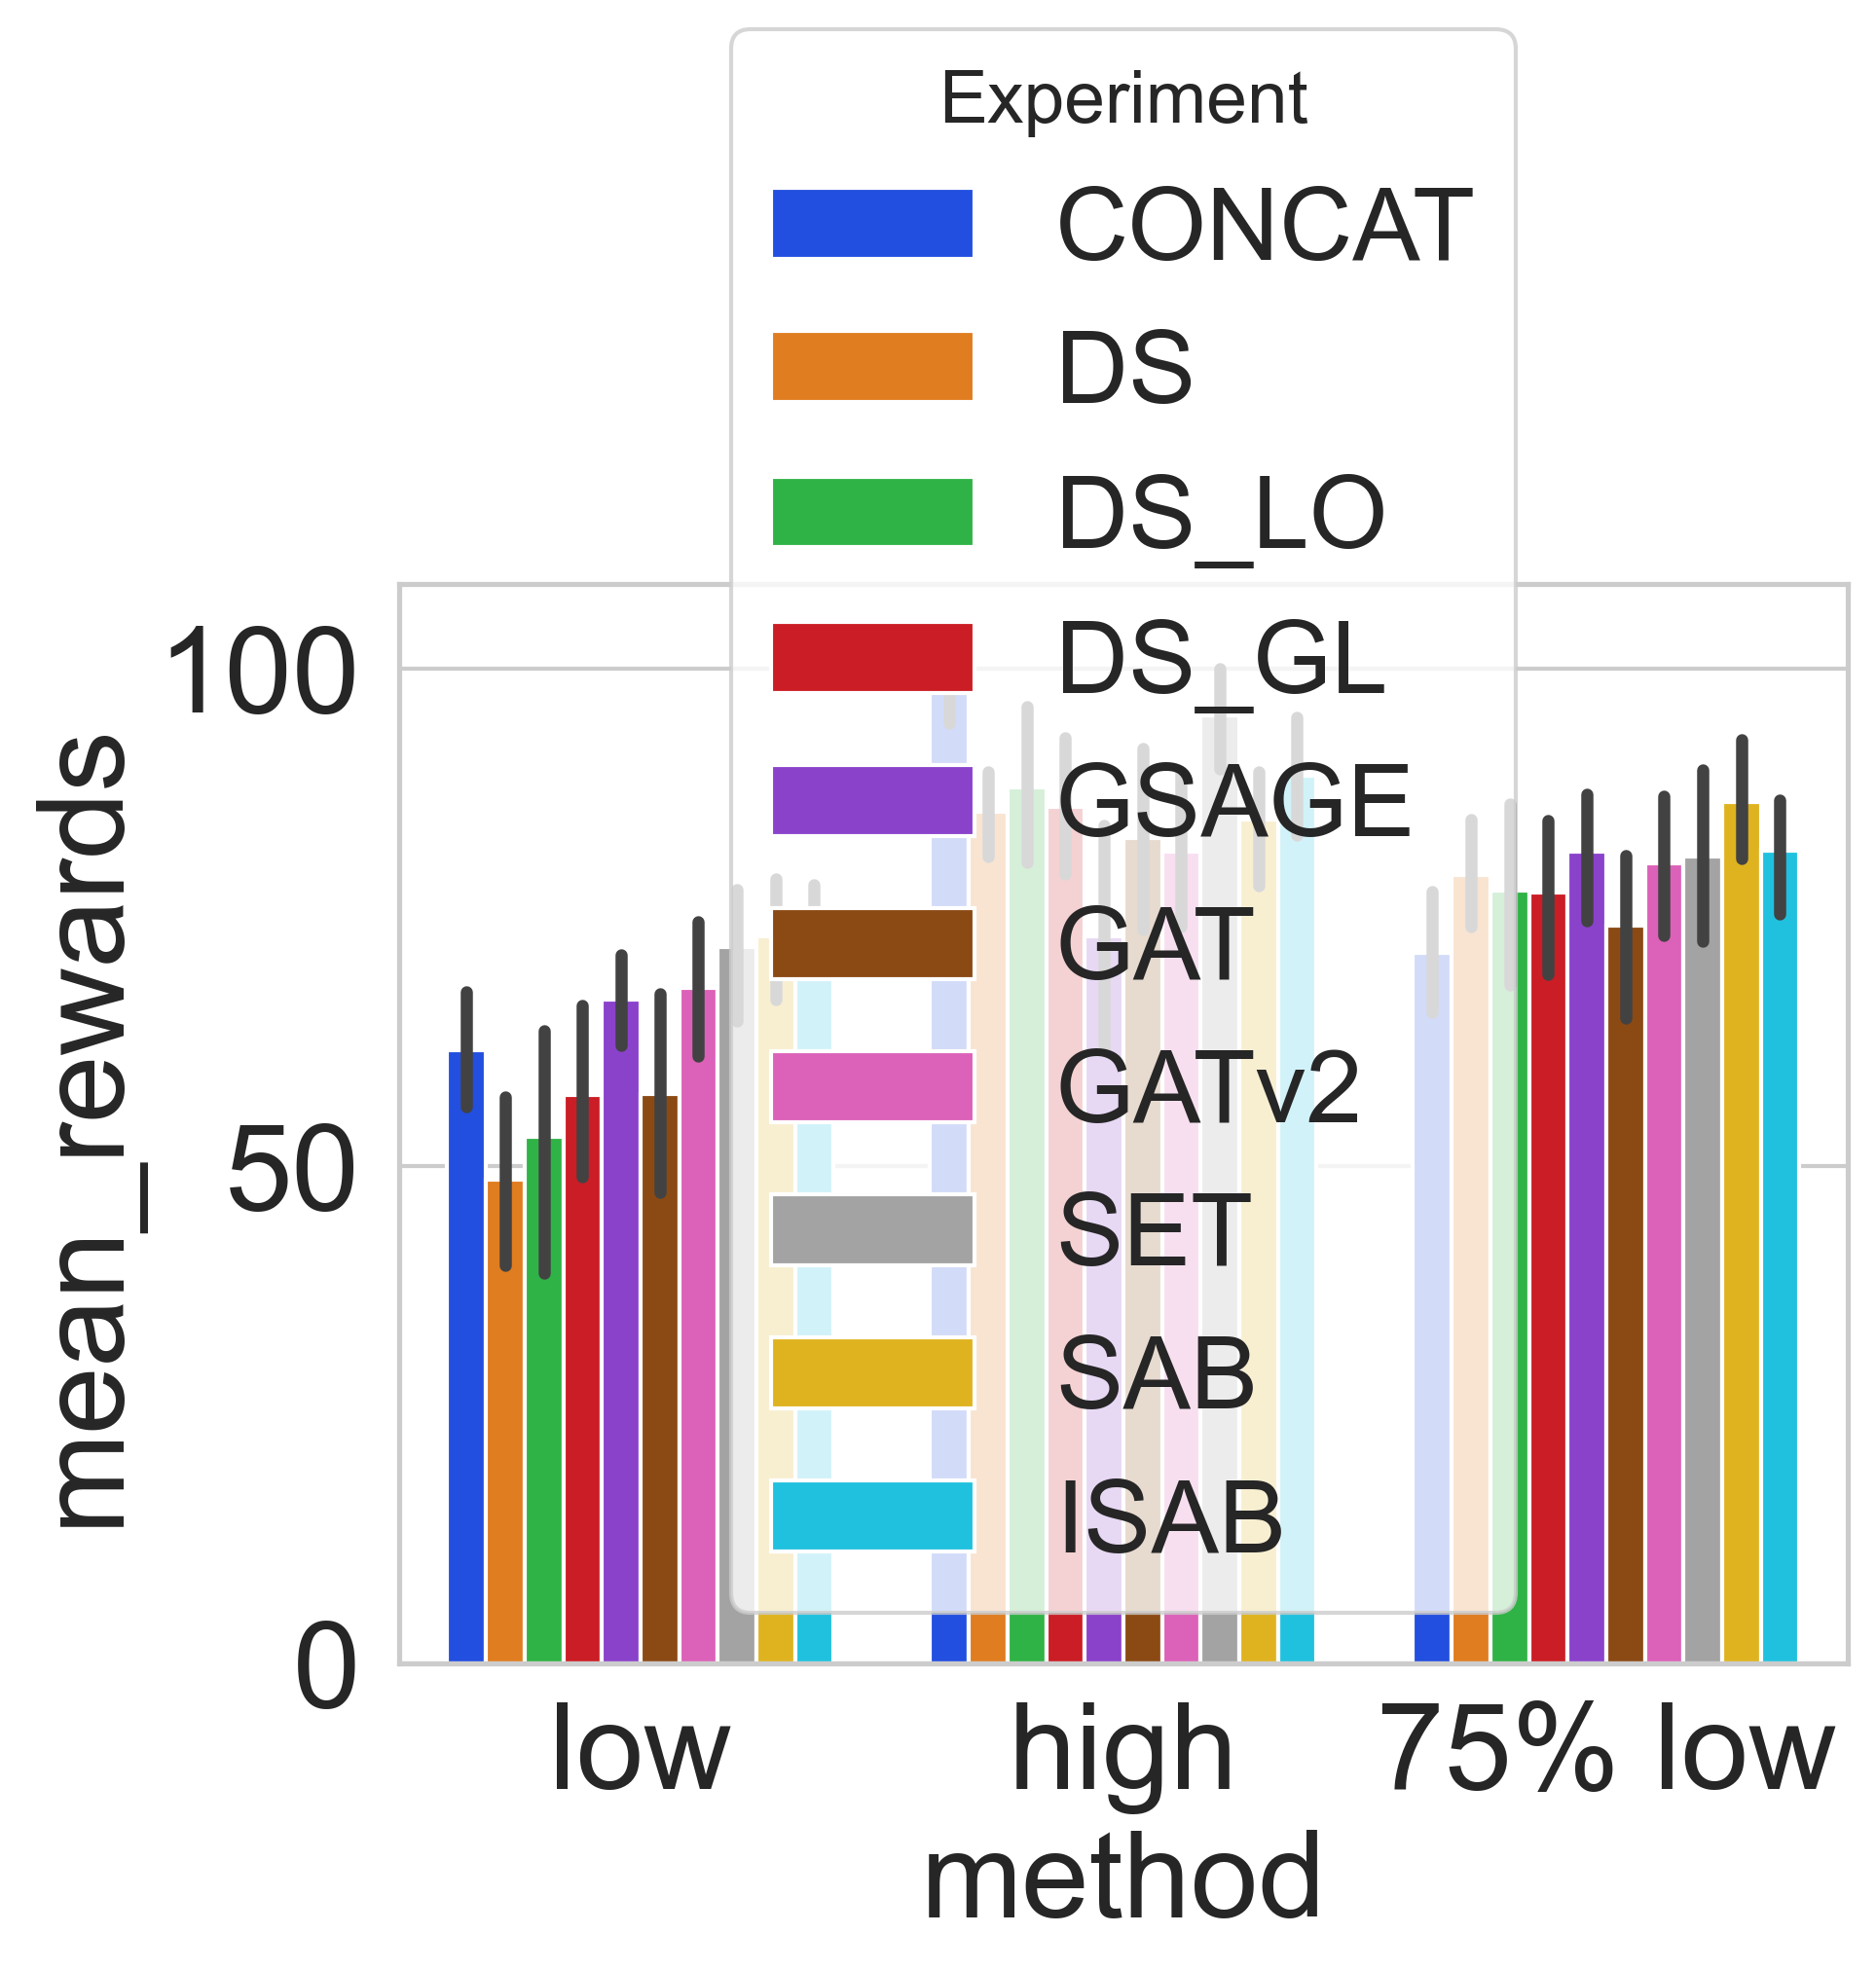

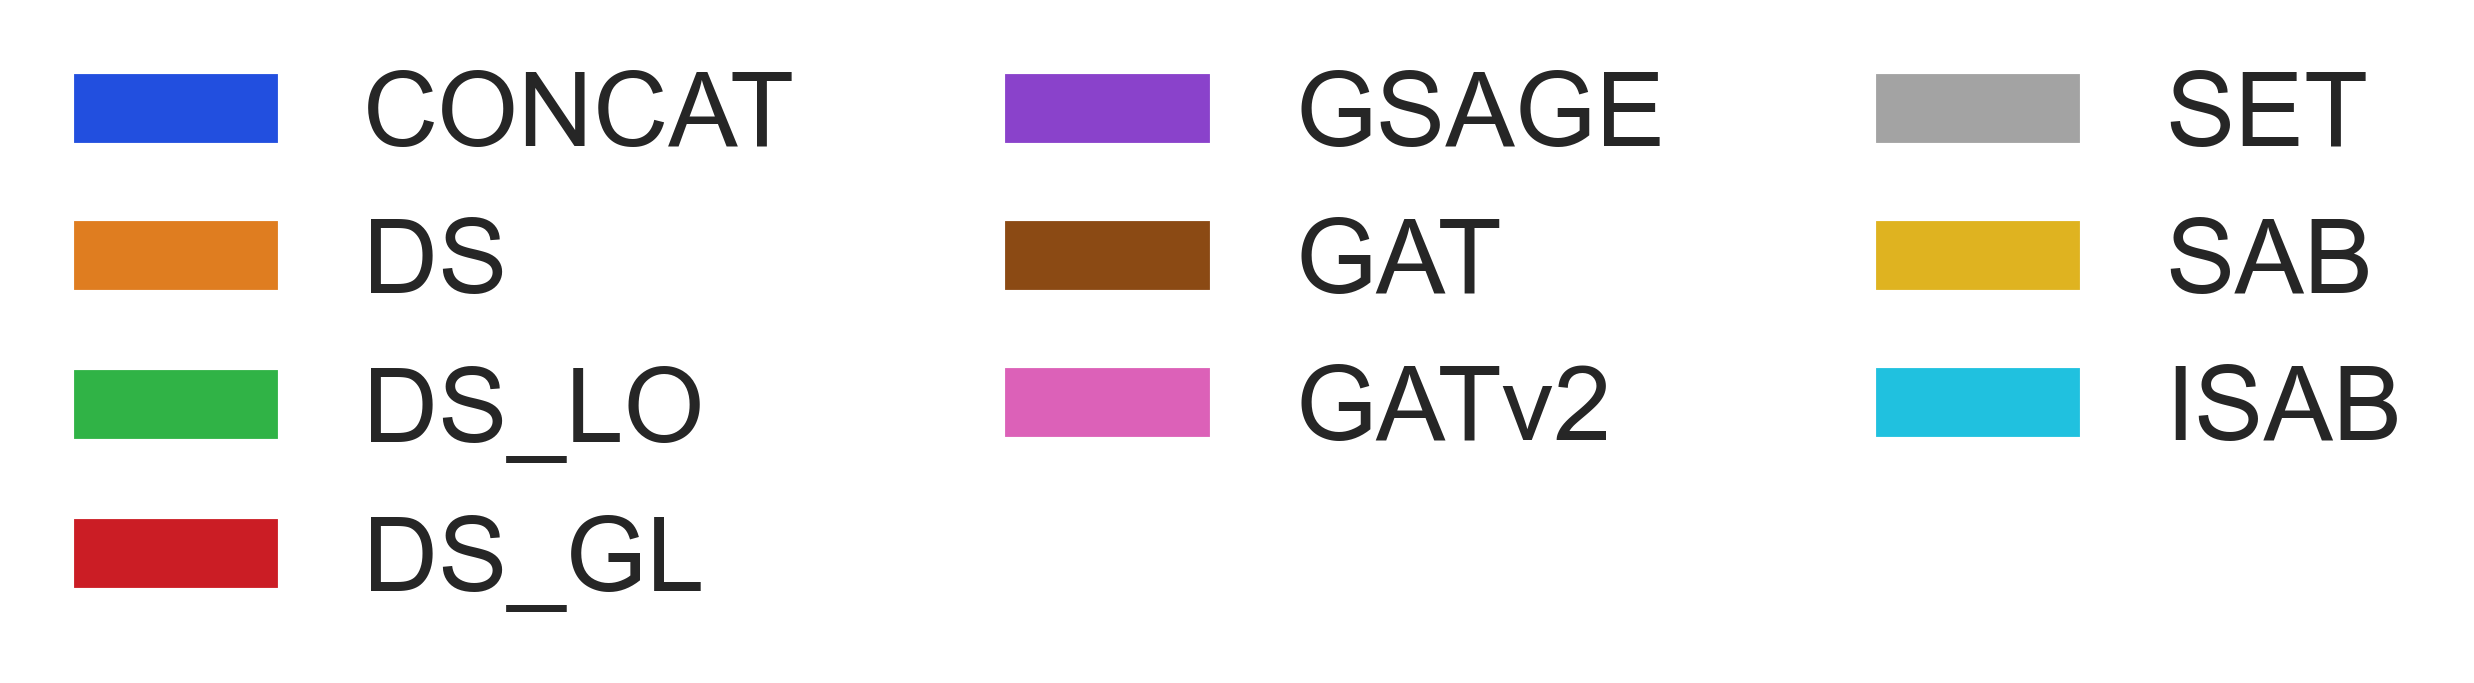

In [27]:
df_combined['Experiment'] = df_combined['Experiment'].replace('MLP', 'DS')
df_combined['Experiment'] = df_combined['Experiment'].replace('MLP_LOCAL', 'DS_LO')
df_combined['Experiment'] = df_combined['Experiment'].replace('MLP_GLOBAL', 'DS_GL')


plot_only_legend(df_combined, to_plot='mean_rewards')